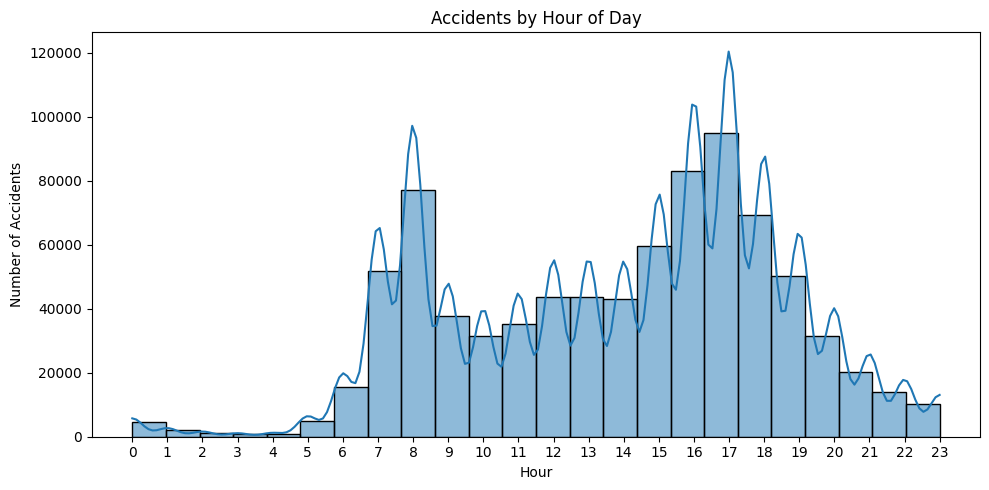

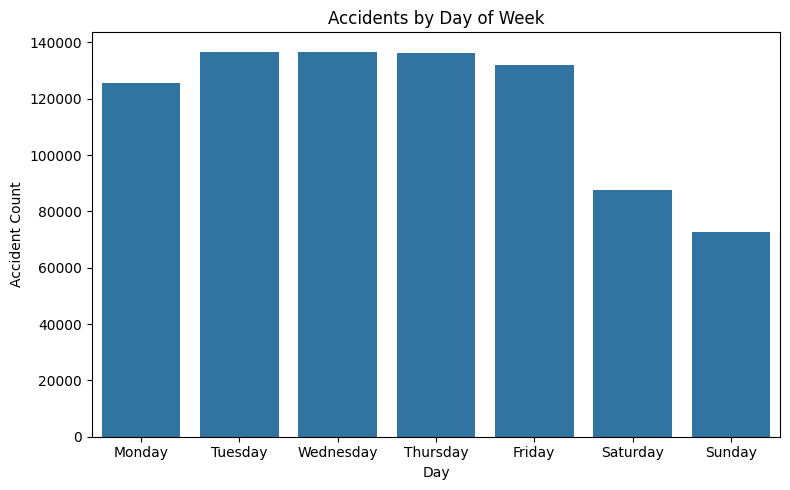

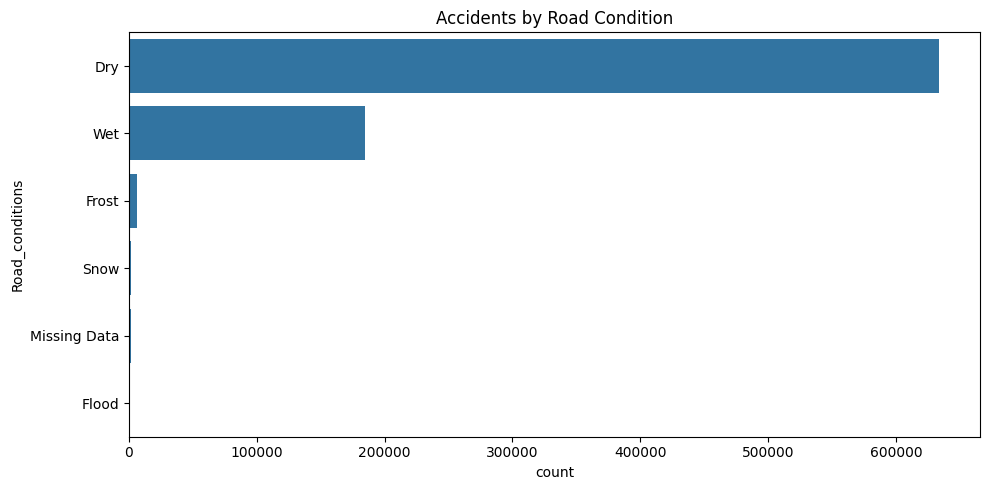

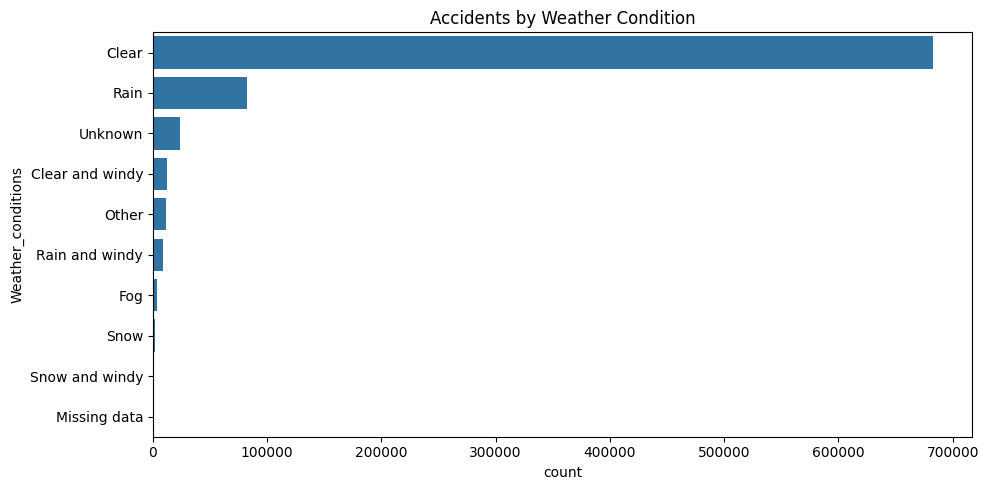

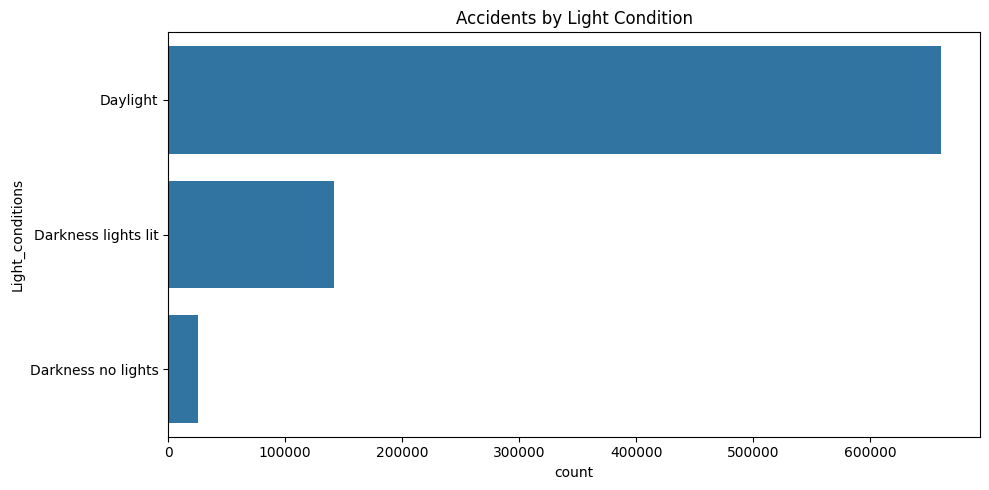

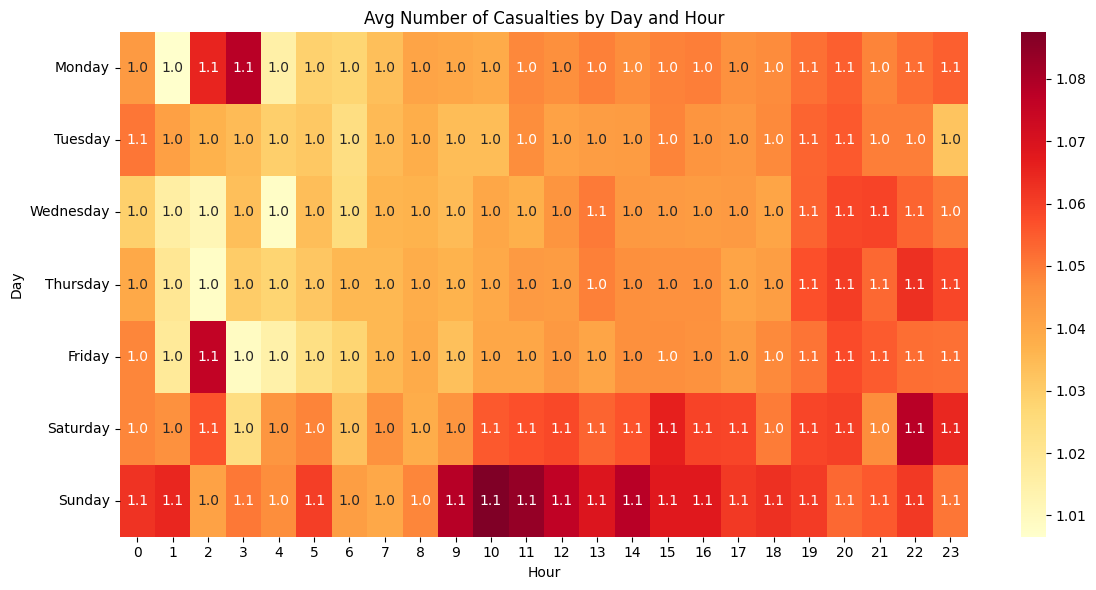

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Accidents.csv", parse_dates=["Date"])

# Convert 'Time' to datetime to extract hour
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.hour

# Clean up categories
df['Weather_conditions'] = df['Weather_conditions'].fillna("Unknown")
df['Road_conditions'] = df['Road_conditions'].fillna("Unknown")
df['Light_conditions'] = df['Light_conditions'].fillna("Unknown")
df['Road_type'] = df['Road_type'].fillna("Unknown")

# --- Visualization 1: Accidents by Hour of Day ---
plt.figure(figsize=(10,5))
sns.histplot(df['Hour'].dropna(), bins=24, kde=True)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# --- Visualization 2: Accidents by Day of Week ---
plt.figure(figsize=(8,5))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(data=df, x='Day', order=order)
plt.title("Accidents by Day of Week")
plt.xlabel("Day")
plt.ylabel("Accident Count")
plt.tight_layout()
plt.show()

# --- Visualization 3: Road Conditions ---
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Road_conditions', order=df['Road_conditions'].value_counts().index)
plt.title("Accidents by Road Condition")
plt.tight_layout()
plt.show()

# --- Visualization 4: Weather Conditions ---
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Weather_conditions', order=df['Weather_conditions'].value_counts().index)
plt.title("Accidents by Weather Condition")
plt.tight_layout()
plt.show()

# --- Visualization 5: Light Conditions ---
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='Light_conditions', order=df['Light_conditions'].value_counts().index)
plt.title("Accidents by Light Condition")
plt.tight_layout()
plt.show()

# --- Visualization 6: Severity Heatmap by Hour and Day ---
pivot = df.pivot_table(index='Day', columns='Hour', values='Number_of_Casualties', aggfunc='mean')
pivot = pivot.reindex(order)  # order days
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlOrRd", annot=True, fmt=".1f")
plt.title("Avg Number of Casualties by Day and Hour")
plt.tight_layout()
plt.show()
